05


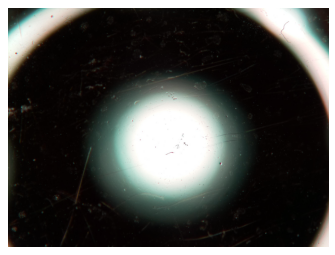

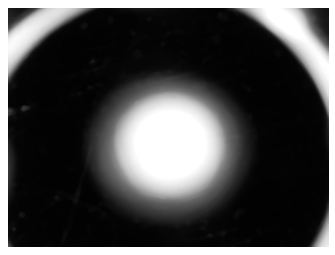

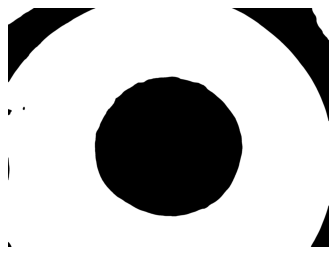

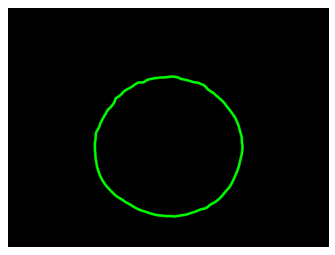

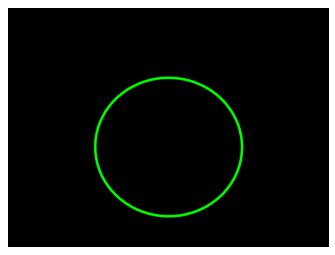

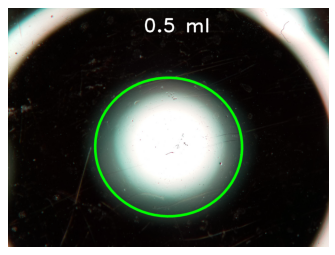

06


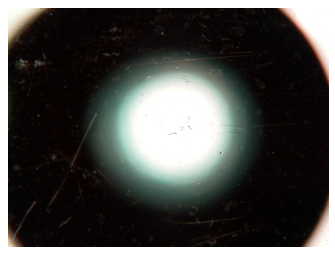

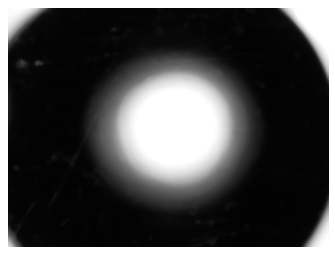

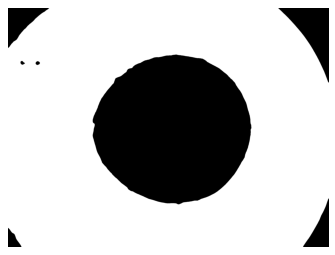

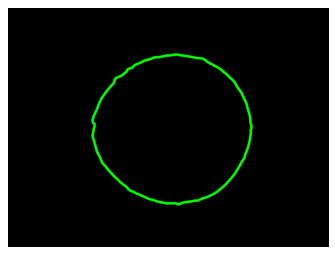

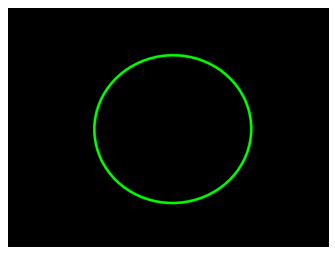

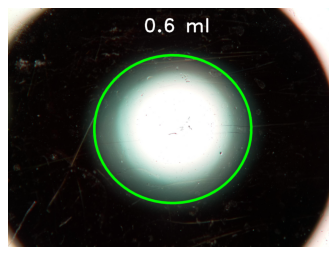

07


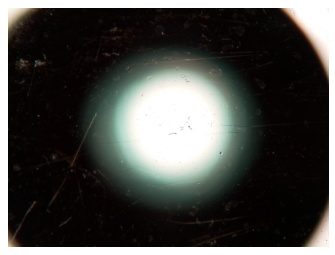

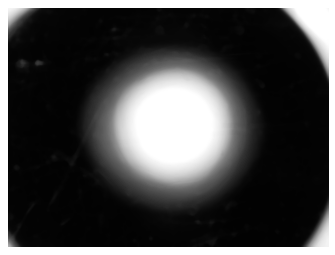

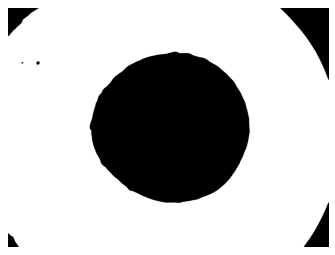

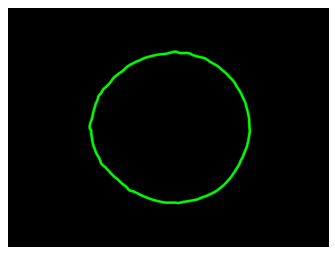

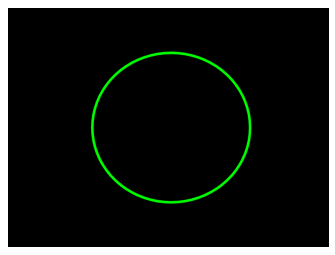

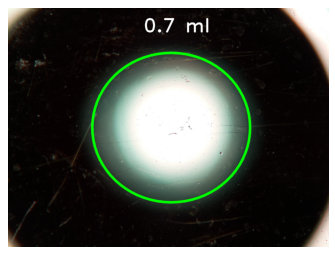

08


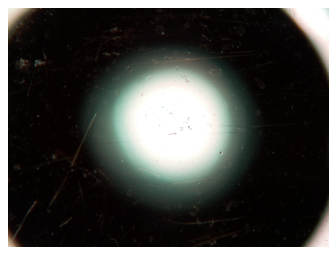

KeyboardInterrupt: 

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
import os
import re


path = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/second-dataset/dataset/"
# Read image.
size = [[],[]]
vol = 0.5
for entry in sorted(os.scandir(path),key=lambda e: e.name):
    #print(entry)
    if (entry.path.endswith(".jpg") or entry.path.endswith(".jpeg") or entry.path.endswith(".png")) and entry.is_file():
        img = cv2.imread(entry.path, cv2.IMREAD_COLOR)
        num = re.split('\.|/',entry.path)
        num = num[len(num)-2]
        print(num)
        # plt.rcParams["figure.figsize"] = [7.50, 3.50]
        # plt.rcParams["figure.autolayout"] = True
        plt.rcParams['figure.dpi'] = 75
        plt.rcParams['savefig.dpi'] = 75
        plt.imshow(img)
        ##plt.title("Raw MJPEG Frame")
        plt.axis('off')
        plt.show()
        
        # Convert to grayscale.
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Blur using 3 * 3 kernel.
        #gray_blurred = cv2.blur(gray, (41, 41))
        gray_blurred = cv2.medianBlur(gray,41)
        # plt.imshow(gray_blurred, cmap='gray', vmin=0, vmax=255)
        # ##plt.title('gray blurred')
        # plt.show() 

        # mask = cv2.inRange(hsv, greenLower, greenUpper)
        eroded = cv2.erode(gray_blurred, None, iterations=2)
        # plt.imshow(eroded)
        # ##plt.title('eroded')
        # plt.show() 
        
        dilated = cv2.dilate(eroded, None, iterations=2)
        # plt.imshow(dilated)
        # #plt.title('dilated')
        # plt.show()    
        
        plt.imshow(gray_blurred, cmap='gray', vmin=0, vmax=255)
        #plt.title('Blurred, Eroded, and Dilated')
        plt.axis("off")
        plt.show() 

        ret, thresh = cv2.threshold(dilated, 50, 255, cv2.THRESH_BINARY_INV)
    
    
        plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
        plt.axis("off")
        #plt.title('Threshold')
        plt.show() 
        # Apply Hough transform on the blurred image.
#         detected_circles = cv2.HoughCircles(thresh, 
#                            cv2.HOUGH_GRADIENT, 1, 200, param1 = 10,
#                            param2 = 100, minRadius = 400, maxRadius = 4000)
#         detected_circles = cv2.HoughCircles(thresh, 
#                             cv2.HOUGH_GRADIENT, 1, 200, param1 = 1,
#                             param2 = 1, minRadius = 400, maxRadius = 4000)
        threshold_area = 5000     #threshold area 
        contours, hierarchy = cv2.findContours(thresh,1,2)  
        cnt = contours[0]
        for cntr in contours:        
            area = cv2.contourArea(cntr)         
            if area > threshold_area:
                cnt = cntr
                break
                 #Put your code in here
                    
#         contours,hierarchy = cv2.findContours(thresh, 1, 2)
# #cnt = contours[0]
#         M = cv2.moments(cnt)

        # print(M)

        # area = cv2.contourArea(cnt)
        # print(area)
        thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
        
        black = np.zeros(img.shape, dtype = "uint8")
        # plt.imshow(my_img_1)
        # plt.show()
        
        contour = black

        cv2.drawContours(contour, [cnt], 0, (0,255,0), 20)
        #cv2.ellipse(img,ellipse,(0,255,0),10)
        plt.imshow(contour)
        #plt.title("detected contour")
        plt.axis('off')
        plt.show()

        black = np.zeros(img.shape, dtype = "uint8")
        ellipse = cv2.fitEllipse(cnt)
        elliptical = black
        #cv2.drawContours(elliptical, [cnt], 0, (0,255,0), 20)
        cv2.ellipse(elliptical,ellipse,(0,255,0),20)
        plt.imshow(elliptical)
        #plt.title("Elliptical Approximation")
        plt.axis('off')
        plt.show()
        
        cv2.ellipse(img,ellipse,(0,255,0),20)
        
                    # font
        #font = cv2.FONT_HERSHEY_SIMPLEX
        font = cv2.FONT_HERSHEY_DUPLEX
        # org
        org = (50, 50)
        # fontScale
        fontScale = 5
        # Blue color in BGR
        color = (255, 255, 255)
        # Line thickness of 2 px
        thickness = 10
        img = cv2.putText(img, str(int(num)/10)+" ml", (int(img.shape[1]/2)-200,200), font, 
                fontScale, color, thickness, cv2.LINE_AA)
        plt.imshow(img)
        #plt.title("Elliptical Approximation")
        plt.axis('off')
        plt.show()
        (a,b) = ellipse[1]
        perimeter = (2 * 3.14 *
            sqrt((a * a + b * b) /
                       (2 * 1.0)));
        
        
        size[0].append(int(num)/10)
        #size[1].append(perimeter)
        size[1].append(cv2.contourArea(cnt))
        vol += 0.1
        #print(detected_circles)
        # Draw circles that are detected.
#         if detected_circles is not None:

#             # Convert the circle parameters a, b and r to integers.
#             detected_circles = np.uint16(np.around(detected_circles))

#             for pt in detected_circles[0, :]:
#                 a, b, r = pt[0], pt[1], pt[2]

#                 # Draw the circumference of the circle.
#                 cv2.circle(img, (a, b), r, (0, 255, 0), 2)

#                 # Draw a small circle (of radius 1) to show the center.
#                 cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
#                 #cv2.imshow("Detected Circle", img)
#                 plt.imshow(img)
#                 #plt.title('my picture')
#                 plt.show()
#                 size[0].append(int(num)/10)
#                 size[1].append(r)

In [59]:
(gray_blurred.shape, 1)

((1944, 2592), 1)

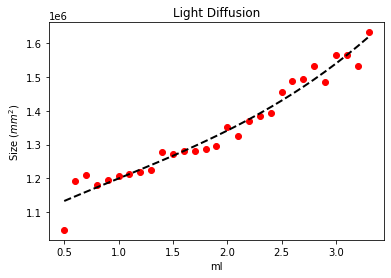

y=9121.406858x+(-26313.593324)


In [14]:
import matplotlib.pylab as plt
import numpy as np
plt.plot(size[0],size[1], 'ro')
x= size[0];
y=size[1];
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),'k--',linewidth=2)
color = 0.8;
plt.ylabel('Size ($mm^2$)')
plt.xlabel('ml')
#plt.title("Light Diffusion")
plt.show()
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

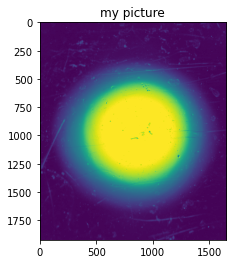

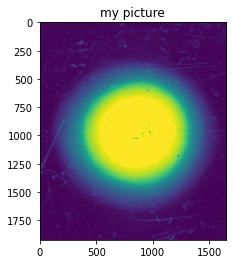

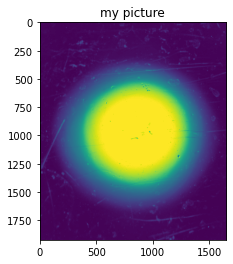

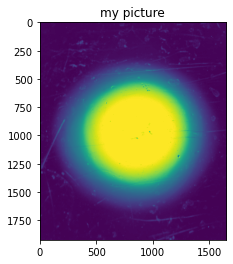

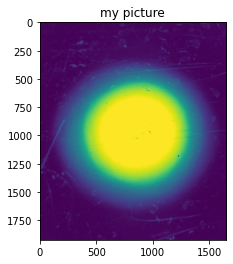

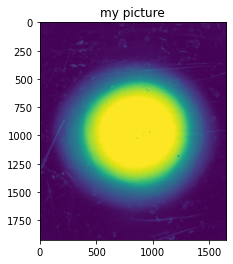

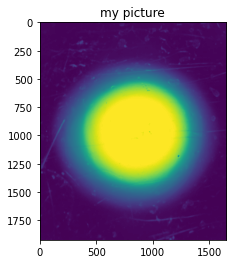

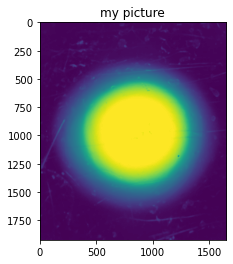

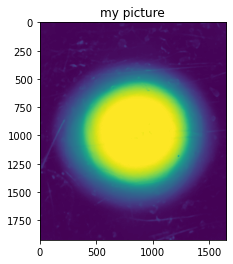

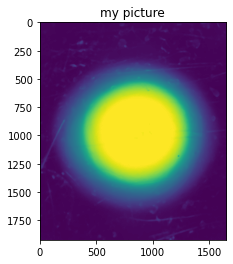

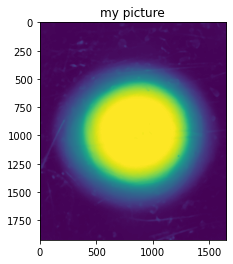

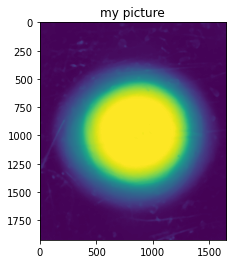

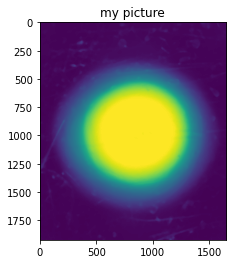

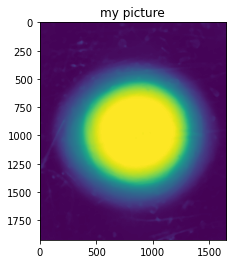

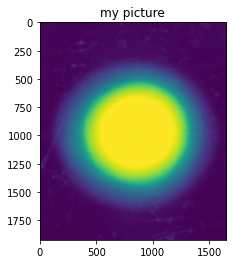

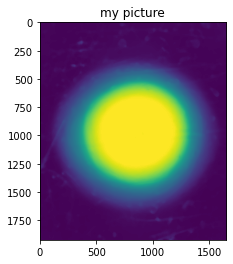

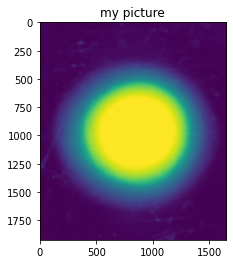

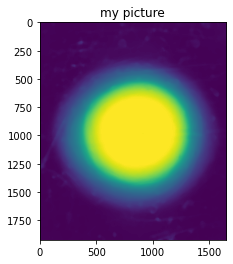

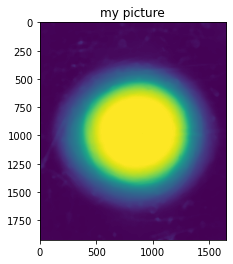

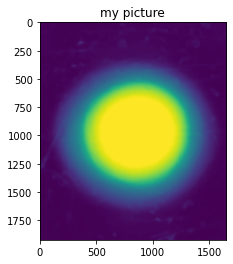

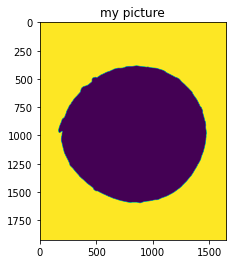

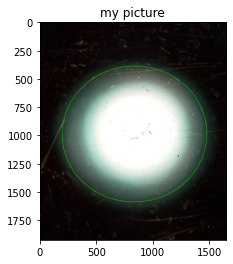

7771.1135344876675


In [74]:
from math import sqrt
path = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/second-dataset/cropped-dataset/"
img = cv2.imread(path+"06.jpeg", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (41, 41))

for i in range(1, 41, 2):
    blurred = cv2.medianBlur(gray, i)
    plt.imshow(blurred)
    #plt.title('my picture')
    plt.show() 
ret, thresh = cv2.threshold(gray_blurred, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
#plt.title('my picture')
plt.show() 

contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
# print(M)

# area = cv2.contourArea(cnt)
# print(area)

ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(img)
#plt.title('my picture')
plt.show() 
(a,b) = ellipse[1]

perimeter = (2 * 3.14 *
            sqrt((a * a + b * b) /
                       (2 * 1.0)));

print(perimeter)


# # find contours in the mask and initialize the current
# # (x, y) center of the ball
# cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# center = None
# # only proceed if at least one contour was found
# if len(cnts) > 0:
#     # find the largest contour in the mask, then use
#     # it to compute the minimum enclosing circle and
#     # centroid
#     c = max(cnts, key=cv2.contourArea)
#     ((x, y), radius) = cv2.minEnclosingCircle(c)
#     M = cv2.moments(c)
#     center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
#     # only proceed if the radius meets a minimum size
#     if radius > 10:
#         # draw the circle and centroid on the frame,
#         # then update the list of tracked points
#         cv2.circle(frame, (int(x), int(y)), int(radius),
#             (0, 255, 255), 2)
#         cv2.circle(frame, center, 5, (0, 0, 255), -1)


In [52]:
img.shape[1]/2

1296.0